# Exploratory Data Analysis (EDA) for Crawled News Data

This notebook analyzes the news articles collected by the crawlers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## 1. Load Data

We will load all `articles.csv` files found in the `data/` directory.

In [2]:
def load_data(data_dir="data"):
    all_dfs = []
    path = Path(data_dir)
    
    # Find all articles.csv files recursively
    for file_path in path.rglob("articles.csv"):
        try:
            # Determine source from parent directory name
            source = file_path.parent.name
            
            df = pd.read_csv(file_path)
            df["source"] = source
            all_dfs.append(df)
            print(f"Loaded {len(df)} articles from {source}")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            
    if not all_dfs:
        print("No data found!")
        return pd.DataFrame()
        
    return pd.concat(all_dfs, ignore_index=True)

df = load_data()
print(f"\nTotal Articles: {len(df)}")
df.head()

Loaded 43 articles from vnexpress
Loaded 12 articles from tuoitre
Loaded 35 articles from thanhnien
Loaded 56 articles from vietnamnet
Loaded 24 articles from nld

Total Articles: 170


,article_id,url,title,short_description,author,category,published_at,content,source,tags
0,79bb047fea957dba1b906d38dc24f17dc81a47df,https://vnexpress.net/nhung-nguoi-dung-lai-cha...,Những người dựng lại chân dung liệt sĩ,Nhóm Skyline do Phùng Quang Trung sáng lập đã ...,Hồng Chiêu,Thời sự,"Thứ năm, 4/12/2025, 06:00 (GMT+7)","Mùa hè năm 2021, một người đàn ông mang tấm ản...",vnexpress,NaN
1,9b63c7a45dec07c24c76c8e83379e6791664eaad,https://vnexpress.net/bien-dong-co-the-sap-xua...,Biển Đông có thể sắp xuất hiện bão số 16,Một áp thấp nhiệt đới đang hoạt động phía đông...,Gia Chính,Thời sự,"Thứ năm, 4/12/2025, 10:47 (GMT+7)","Tại họp báo sáng 4/12, ông Hoàng Đức Cường, Cụ...",vnexpress,NaN
2,7f089ef5d6c683eda89ae0abd9d5c07319598b82,https://vnexpress.net/tong-bi-thu-moi-nguoi-kh...,Tổng Bí thư: Mọi người khuyết tật đều có cơ hộ...,Tổng Bí thư Tô Lâm yêu cầu thiết kế chính sách...,Vũ Tuân,Chính trị,"Thứ tư, 3/12/2025, 23:12 (GMT+7)",Chủ trì buổi làm việc về thực hiện chính sách ...,vnexpress,NaN
3,21e33444ad17b89b8e092982b65e8a40cdf8a3c3,https://vnexpress.net/bui-cong-nam-dong-hanh-n...,Bùi Công Nam đồng hành ngày hội vệ sinh học đường,Quảng TrịGần 300 học sinh trường PTDT Nội trú ...,Đắc Thành,Quỹ Hy vọng,"Thứ năm, 4/12/2025, 00:00 (GMT+7)","Sáng 3/12, Quỹ Hy vọng phối hợp với Opella Việ...",vnexpress,NaN
4,d087b75d33ce9e6ed5eed2acaef1a1618b438402,https://vnexpress.net/khoang-trong-du-lieu-cha...,NaN,Hà Nội hiện có ít nhất 61 trạm quan trắc chất ...,NaN,Graphics/Data Story,NaN,'Khoảng trống' dữ liệu chất lượng không khí Hà...,vnexpress,NaN


## 2. Data Cleaning & Preprocessing

In [3]:
if not df.empty:
    # Convert published_at to datetime (handling errors)
    # Note: Formats vary by crawler, so we might need flexible parsing or just skip for now if too messy
    # For this EDA, we'll try a generic parse
    # df['published_at'] = pd.to_datetime(df['published_at'], errors='coerce')
    
    # Drop duplicates by URL
    df = df.drop_duplicates(subset=["url"])
    print(f"Articles after removing duplicates: {len(df)}")

Articles after removing duplicates: 170


## 3. Basic Statistics

/tmp/ipykernel_14610/3193324428.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x="source", palette="viridis")


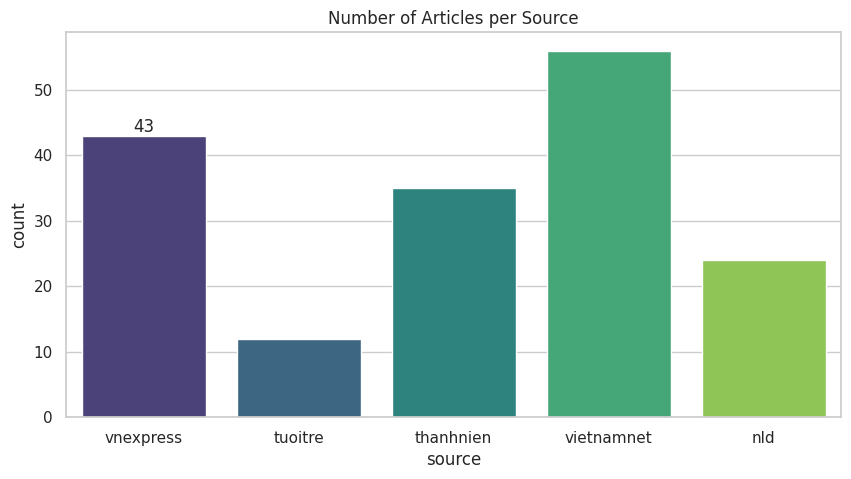

In [4]:
if not df.empty:
    # Articles per Source
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=df, x="source", palette="viridis")
    ax.bar_label(ax.containers[0])
    plt.title("Number of Articles per Source")
    plt.show()

/tmp/ipykernel_14610/2106198157.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")


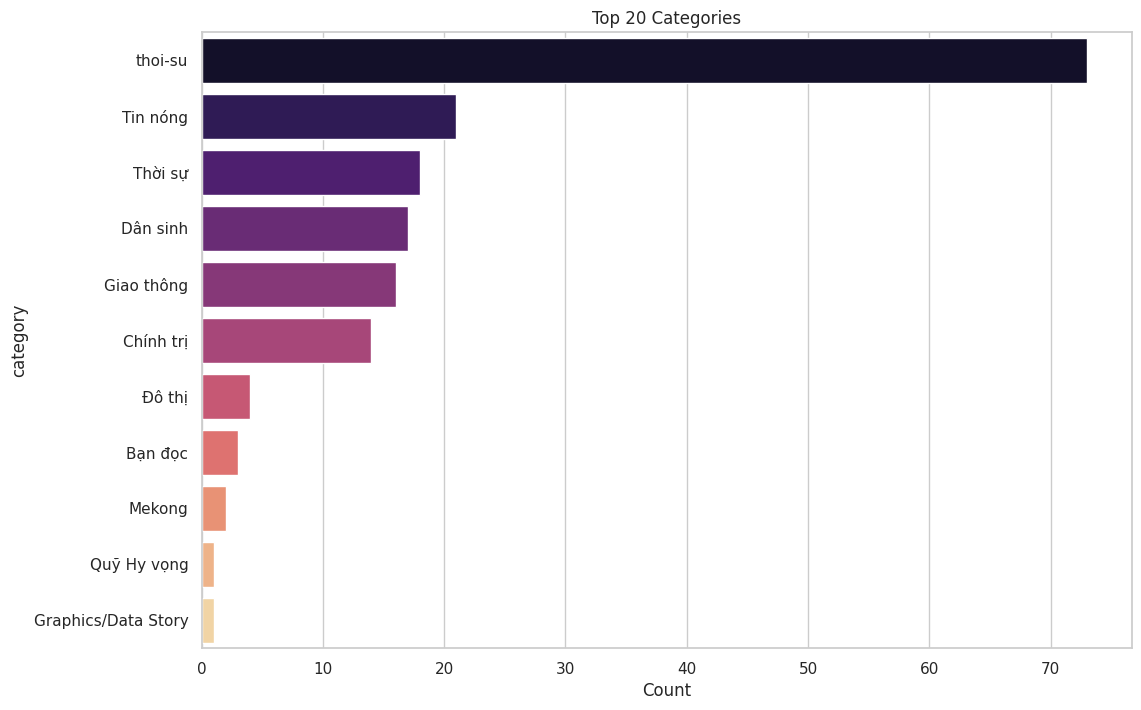

In [5]:
if not df.empty:
    # Articles per Category (Top 20)
    plt.figure(figsize=(12, 8))
    top_categories = df["category"].value_counts().head(20)
    sns.barplot(x=top_categories.values, y=top_categories.index, palette="magma")
    plt.title("Top 20 Categories")
    plt.xlabel("Count")
    plt.show()

## 4. Content Analysis

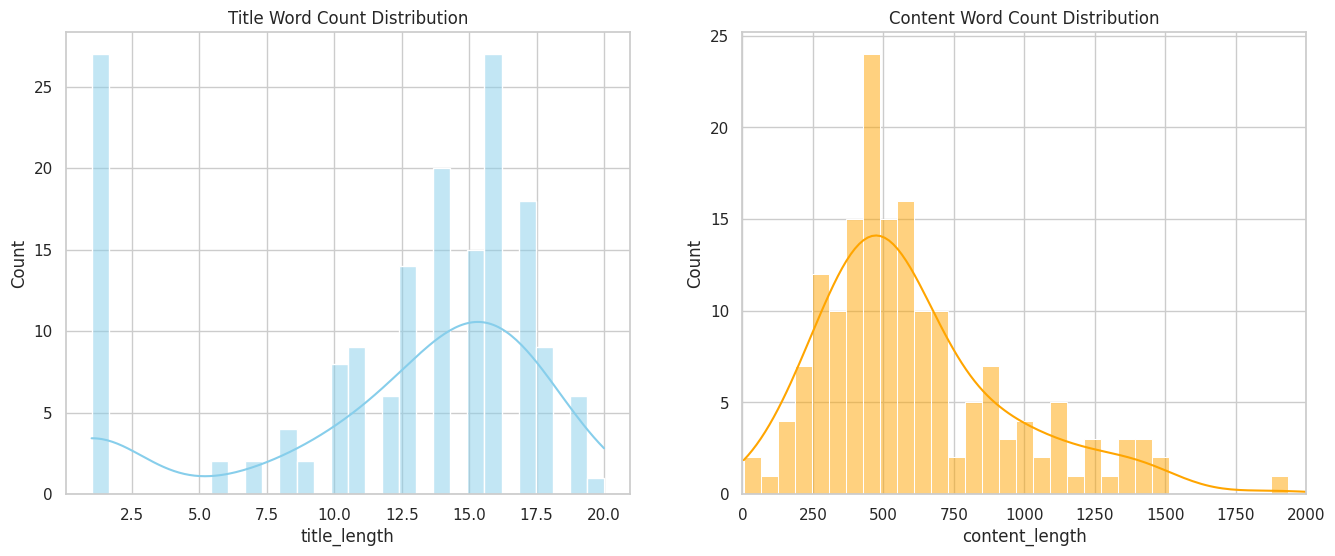

In [6]:
if not df.empty:
    # Word Count Distribution
    df["title_length"] = df["title"].astype(str).apply(lambda x: len(x.split()))
    df["content_length"] = df["content"].astype(str).apply(lambda x: len(x.split()))

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.histplot(df["title_length"], bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title("Title Word Count Distribution")

    sns.histplot(df["content_length"], bins=50, kde=True, ax=axes[1], color="orange")
    axes[1].set_title("Content Word Count Distribution")
    axes[1].set_xlim(0, 2000) # Limit x-axis for better visibility

    plt.show()